In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from pandas import DataFrame
#%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix

In [10]:
df1 = pandas.DataFrame()
df2 = pandas.DataFrame()
df3 = pandas.DataFrame()
df4 = pandas.DataFrame()

In [11]:
for l in range(15):
    #l = 0+k
    fans1 = pandas.read_csv("fans1"+str(l)+"_before.txt",delimiter = ' ')
    fans2 = pandas.read_csv("fans2"+str(l)+"_before.txt",delimiter = ' ')
    fans3 = pandas.read_csv("fans3"+str(l)+"_before.txt",delimiter = ' ')
    fans4 = pandas.read_csv("fans4"+str(l)+"_before.txt",delimiter = ' ')
    
    diff = np.zeros(4501)
    for i in range(4500):
        diff[i] = (fans1.loc[i:i,'my'] - fans1.loc[i:i,'real'])*(fans1.loc[i:i,'my'] - fans1.loc[i:i,'real'])
    df1['diff'+str(l)] = diff
    diff = np.zeros(2501)
    for i in range(2500):
        diff[i] = (fans2.loc[i:i,'my'] - fans2.loc[i:i,'real'])*(fans2.loc[i:i,'my'] - fans2.loc[i:i,'real'])
    df2['diff'+str(l)] = diff
    diff = np.zeros(1301)
    for i in range(1300):
        diff[i] = (fans3.loc[i:i,'my'] - fans3.loc[i:i,'real'])*(fans3.loc[i:i,'my'] - fans3.loc[i:i,'real'])
    df3['diff'+str(l)] = diff
    diff = np.zeros(851)
    for i in range(850):
        diff[i] = (fans4.loc[i:i,'my'] - fans4.loc[i:i,'real'])*(fans4.loc[i:i,'my'] - fans4.loc[i:i,'real'])
    df4['diff'+str(l)] = diff
    print l

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [12]:
print (df1.describe())
print (df2.describe())
print (df3.describe())
print (df4.describe())

             diff0        diff1        diff2        diff3        diff4  \
count  4501.000000  4501.000000  4501.000000  4501.000000  4501.000000   
mean      1.808895     0.054025     0.044211     0.039187     0.037157   
std       0.592427     0.047123     0.056767     0.050820     0.047855   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.199680     0.012875     0.003348     0.003392     0.003714   
50%       2.355372     0.023140     0.012987     0.013241     0.013463   
75%       2.384251     0.095243     0.075786     0.068669     0.065139   
max       2.398500     0.201745     0.294781     0.282093     0.241303   

             diff5        diff6        diff7        diff8        diff9  \
count  4501.000000  4501.000000  4501.000000  4501.000000  4501.000000   
mean      0.036530     0.036398     0.036424     0.036490     0.036559   
std       0.047066     0.047079     0.047321     0.047593     0.047836   
min       0.000000     0.000000     0

In [32]:
mean1 = df1.mean()
mean2 = df2.mean()
mean3 = df3.mean()
mean4 = df4.mean()
#f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True)
x = np.linspace(0,16,16)
#ax2.plot(x,mean2)
#ax3.plot(x,mean3)
#ax4.plot(x,mean4)

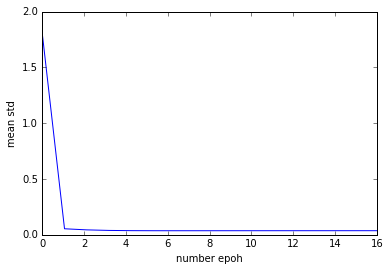

In [48]:
plt.plot(x,mean1[0:16])
plt.ylabel('mean std')
plt.xlabel('number epoh')
plt.savefig('preflop.png')

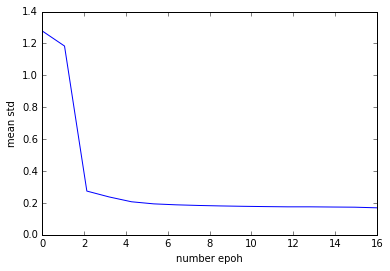

In [47]:
plt.plot(x,mean2[0:16])
plt.ylabel('mean std')
plt.xlabel('number epoh')
plt.savefig('flop.png')

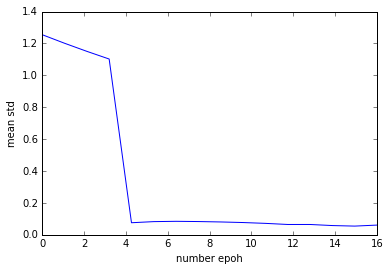

In [50]:
plt.plot(x,mean3[0:16])
plt.ylabel('mean std')
plt.xlabel('number epoh')
plt.savefig('turn.png')

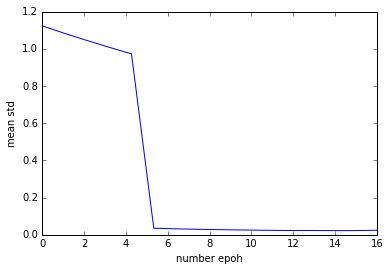

In [45]:
plt.plot(x,mean4[0:16])
plt.ylabel('mean std')
plt.xlabel('number epoh')
plt.savefig('river.png')

In [6]:
fans10 = pandas.read_csv("fans30_before.txt",delimiter = ' ')
fans11 = pandas.read_csv("fans316_before.txt",delimiter = ' ')

y_pred0 = []
for i in range(fans10.shape[0]):
    if fans10.loc[i:i,'my'].values > 0.1:
        y_pred0.append(1)
    if fans10.loc[i:i,'my'].values >= -0.1 and fans10.loc[i:i,'my'].values <= 0.1:
        y_pred0.append(0)
    if fans10.loc[i:i,'my'].values < -0.1:
        y_pred0.append(-1)
y_true0 = []
for i in range(fans10.shape[0]):
    if fans10.loc[i:i,'real'].values > 0.1:
        y_true0.append(1)
    if fans10.loc[i:i,'real'].values >= -0.1 and fans10.loc[i:i,'real'].values <= 0.1:
        y_true0.append(0)
    if fans10.loc[i:i,'real'].values < -0.1:
        y_true0.append(-1)
        
matrix0 = confusion_matrix(y_true0, y_pred0)
diag0 = matrix0.diagonal().sum()
print float(diag0)/matrix0.sum()
        
y_pred1 = []       
for i in range(fans11.shape[0]):
    if fans11.loc[i:i,'my'].values > 0.1:
        y_pred1.append(1)
    if fans11.loc[i:i,'my'].values >= -0.1 and fans11.loc[i:i,'my'].values <= 0.1:
        y_pred1.append(0)
    if fans11.loc[i:i,'my'].values < -0.1:
        y_pred1.append(-1)
y_true1 = []
for i in range(fans11.shape[0]):
    if fans11.loc[i:i,'real'].values > 0.1:
        y_true1.append(1)
    if fans11.loc[i:i,'real'].values >= -0.1 and fans11.loc[i:i,'real'].values <= 0.1:
        y_true1.append(0)
    if fans11.loc[i:i,'real'].values < -0.1:
        y_true1.append(-1)

matrix1 = confusion_matrix(y_true1, y_pred1)
diag1 = matrix1.diagonal().sum()
print float(diag1)/matrix1.sum()

0.427470217239
0.597003745318


In [ ]:
matrix = confusion_matrix(y_true, y_pred)
diag = matrix.diagonal().sum()
print float(diag)/matrix.sum()